In [2]:
import pandas as pd
import joblib
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../data/processed/processed.csv")

In [4]:
X_text = df['clean_text']
numeric_features = df.drop(
    ['clean_text', 'class_label', 'problem_score'],
    axis=1
)

In [5]:
y_score = df['problem_score']

In [6]:
tfidf = joblib.load("../models/tfidf_vectorizer.pkl")

In [7]:
X_tfidf = tfidf.transform(X_text)

In [8]:
X_final = hstack([X_tfidf, numeric_features.values])

In [9]:
X_train, X_test, y_score_train, y_score_test = train_test_split(
    X_final,
    y_score,
    test_size=0.2,
    random_state=42
)

In [10]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1.0)
reg.fit(X_train, y_score_train)
y_score_pred = reg.predict(X_test)



In [11]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_score_test, y_score_pred)
mae


1.6507571744280212

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_score_test, y_score_pred))
rmse

np.float64(1.9970242757009102)

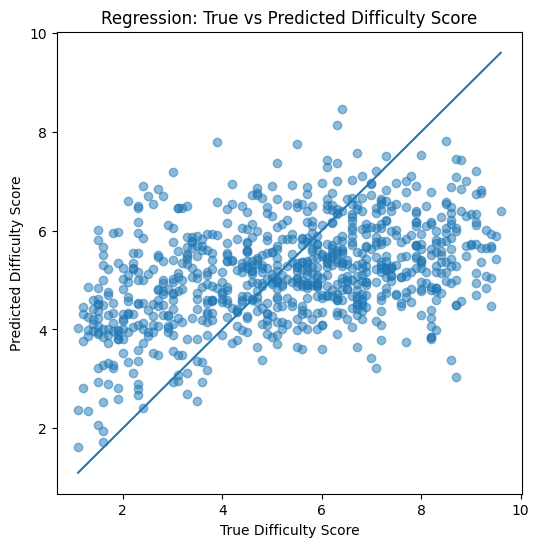

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 6))

plt.scatter(y_score_test, y_score_pred, alpha=0.5)
min_val = min(y_score_test.min(), y_score_pred.min())
max_val = max(y_score_test.max(), y_score_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("True Difficulty Score")
plt.ylabel("Predicted Difficulty Score")
plt.title("Regression: True vs Predicted Difficulty Score")

plt.show()


In [14]:
joblib.dump(reg, "../models/regression_model.pkl")


['../models/regression_model.pkl']